# HOUSE PRICE PREDICTION USING LINEAR REGRESSION

# Step 1: Import Required Libraries

In [1]:
# Importing necessary libraries for data manipulation, machine learning, and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score


# Step 2: Load and Inspect Data

In [2]:
# Load the dataset
data = pd.read_csv('housing.csv')

# Inspect the first few rows of the data
data.head()


FileNotFoundError: [Errno 2] No such file or directory: 'housing.csv'

# Step 3: Handle Missing Values
Let's check for missing values and handle them by either filling with the mean (for numerical columns) or the mode (for categorical columns).

In [ ]:
# Check for missing values
print(data.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


# Step 4: Convert Date Column to DateTime
In this step, we will convert the date column (e.g., '20141013T000000') into a datetime format and also convert it into a numeric value (the number of days since the first date).

In [ ]:


# Check if 'date' column exists
if 'date' in data.columns:
    # Convert 'date' column to datetime using the format
    data['date'] = pd.to_datetime(data['date'], format='%Y%m%dT%H%M%S')
    
    # Convert the datetime column to numeric (days since the earliest date)
    data['date_numeric'] = (data['date'] - data['date'].min()) / np.timedelta64(1, 'D')
    
    # Replace the original 'date' column with 'date_numeric' or keep both columns
    data['date'] = data['date_numeric']  # Replace the date column with the numeric representation
    
    # Drop the 'date_numeric' column if not needed
    data.drop('date_numeric', axis=1, inplace=True)

    # Display the converted data to verify
    print(data.head())


           id   date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7229300521  164.0  231300.0         2       1.00         1180      5650   
1  6414100192  221.0  538000.0         3       2.25         2570      7242   
2  5631500400  299.0  180000.0         2       1.00          770     10000   
3  2487200875  221.0  604000.0         4       3.00         1960      5000   
4  1954400510  292.0  510000.0         3       2.00         1680      8080   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7        1180              0      1955   
1     2.0           0     0  ...      7        2170            400      1951   
2     1.0           0     0  ...      6         770              0      1933   
3     1.0           0     0  ...      7        1050            910      1965   
4     1.0           0     0  ...      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_l

In [ ]:
# Create a new column for the age of the house
data['House_Age'] = 2025 - data['yr_built']
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,House_Age
0,7229300521,164.0,231300.0,2,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,70
1,6414100192,221.0,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,74
2,5631500400,299.0,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,92
3,2487200875,221.0,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,60
4,1954400510,292.0,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,38


# Step 5: Data Visualization with Matplotlib
# 5.1: Distribution of House Prices. We'll visualize the distribution of the target variable (Price).

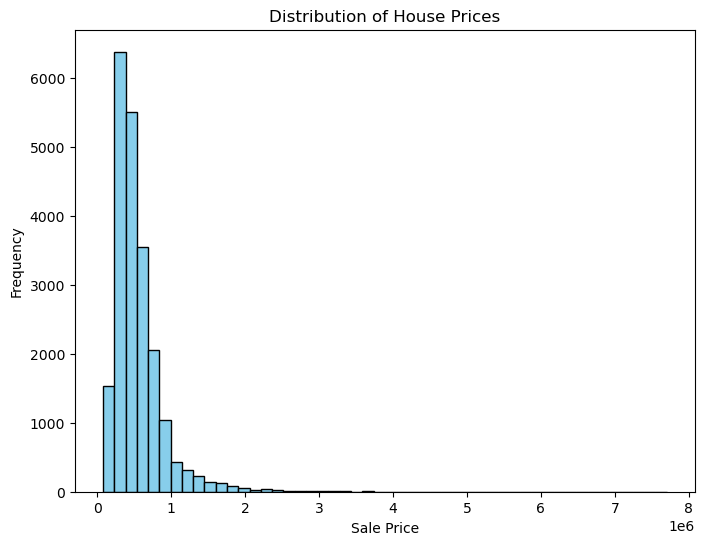

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(data['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


#  Determination and transformation of outliers

In [ ]:
# Calculate the IQR (Interquartile Range)
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")
print(outliers.head())  # Show the first few outliers


Number of outliers: 1146
             id   date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
5    7237550310   10.0  1225000.0         4       4.50         5420    101930   
21   2524049179  116.0  2000000.0         3       2.75         3050     44867   
49    822039084  313.0  1350000.0         3       2.50         2753     65005   
69   1802000060   41.0  1325000.0         5       2.25         3200     20158   
125  4389200955  304.0  1450000.0         4       2.75         2750     17789   

     floors  waterfront  view  ...  sqft_above  sqft_basement  yr_built  \
5       1.0           0     0  ...        3890           1530      2001   
21      1.0           0     4  ...        2330            720      1968   
49      1.0           1     2  ...        2165            588      1953   
69      1.0           0     0  ...        1600           1600      1965   
125     1.5           0     0  ...        1980            770      1914   

     yr_renovated  zipcode      lat  

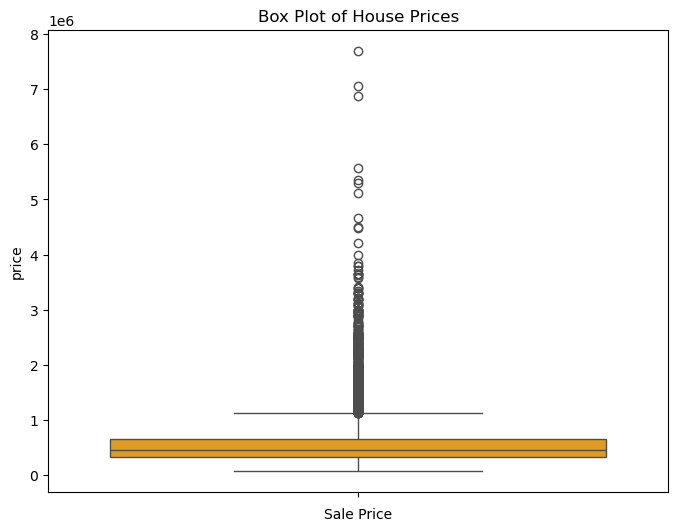

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data['price'], color='orange')
plt.title('Box Plot of House Prices')
plt.xlabel('Sale Price')
plt.show()


# Applying log transformation to convert the outlieres

In [ ]:
 # Cell 3: Apply Log Transformation to the 'Price' column
# Log transform the target variable to reduce the impact of outliers
data['price_log'] = np.log1p(data['price'])

# Verify the transformation
print(data[['price', 'price_log']].head())

      price  price_log
0  231300.0  12.351475
1  538000.0  13.195616
2  180000.0  12.100718
3  604000.0  13.311331
4  510000.0  13.142168


#  Correlation Heatmap
We'll plot the correlation heatmap to see how different features relate to each other and to SalePrice

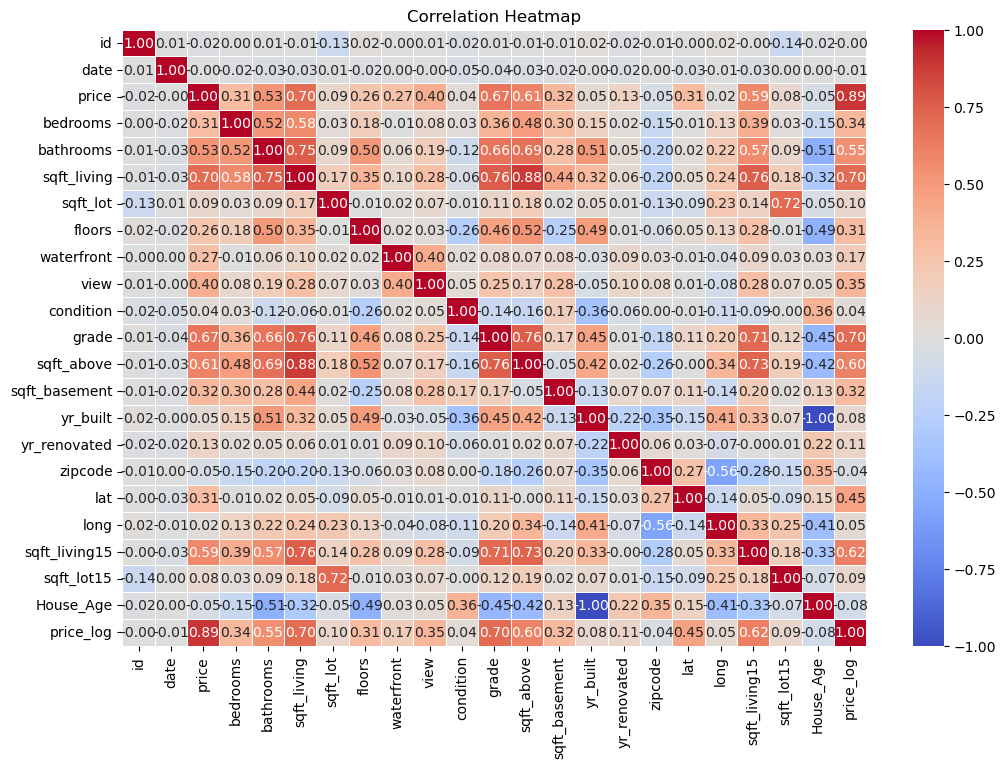

In [ ]:
# Compute the correlation matrix
corr = data.corr()

# Plot a heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


#  Relationship Between House Age and Sale Price
Let's visualize how the age of the house affects its sale price.

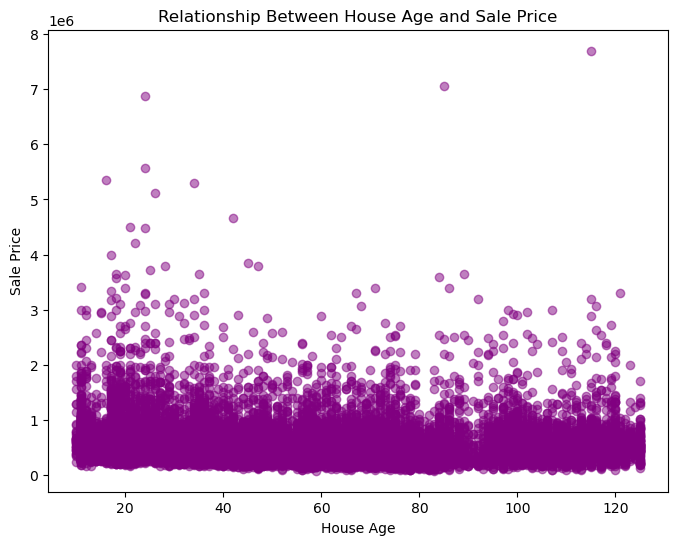

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['House_Age'], data['price'], alpha=0.5, color='purple')
plt.title('Relationship Between House Age and Sale Price')
plt.xlabel('House Age')
plt.ylabel('Sale Price')
plt.show()


# Step 6: Preprocess the Data

In [ ]:
# Select features (X) and target variable (y)
X = data.drop('price', axis=1)  # All columns except the target
y = data['price']  # The target variable


In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (17290, 22)
Testing data shape: (4323, 22)


# Step 7: Train the Linear Regression Model

In [ ]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# Step 8: Make Predictions and Evaluate the Model

In [ ]:
# Evaluate the model performance

#  Make Predictions
y_pred = model.predict(X_test)

#  Evaluate the Model
# Inverse the log transformation to get the predicted prices back to original scale
y_pred_original = np.expm1(y_pred)  # Inverse of log1p is expm1
y_test_original = np.expm1(y_test)  # Inverse of log1p for the test labels

r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"R-squared (R²): {r2}")

R-squared (R²): 0.8326388186531183


C:\Users\Administrator\AppData\Local\Temp\ipykernel_3884\3906030692.py:8: RuntimeWarning: overflow encountered in expm1
  y_pred_original = np.expm1(y_pred)  # Inverse of log1p is expm1
C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Step 6: Visualize the Results 
Plot the actual vs predicted house prices:

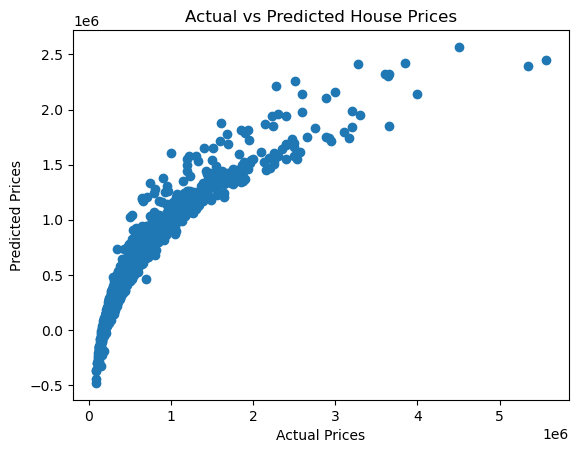

In [ ]:
# Plot the actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()


In [ ]:
import pickle

# Save path
save_path = r"C:\Program Files\PREDICTION\my_model.pkl"

# Try saving
with open(save_path, "wb") as file:
    pickle.dump(model, file)

print("Model saved to:", save_path)


Model saved to: C:\Program Files\PREDICTION\my_model.pkl


In [1]:
import os
print("Files in directory:", os.listdir())


Files in directory: ['app.py', 'HOUSE_PRICE_PREDICTION (2).ipynb', 'Housing.xls', 'model.pk1', 'PREDICTION', 'PREDICTION.code-workspace', 'requirements.txt']
